# Import and warehouse data: [ Score: 5 point ]
Import all the given datasets. Explore shape and size.

 Merge all datasets onto one and explore final shape and size.

In [1]:
#Import the packages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Import the datasets
data= pd.read_csv('TelcomCustomer-Churn.csv')

In [3]:
#Print the first 3 rows of the dataset.
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [4]:
#Check the number of rows and columns.
data.shape

(7043, 21)

# Data cleansing: [ Score: 10 point ]
• Missing value treatment

• Convert categorical attributes to continuous using relevant functional knowledge

• Drop attribute/s if required using relevant functional knowledge

• Automate all the above steps

In [5]:
#Check the datatype.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
#Dropping the column customer Id 
data = data.drop('customerID', axis=1)
data.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [7]:
#Change 'no internet service' and 'no phone service' to NO.
data.replace('No phone service', 'No', inplace=True)
data.replace('No internet service', 'No', inplace=True)

In [8]:
#Convert TotalCharges from object to numeric. 
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


In [10]:
#Now again check for missing values
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
#Drop the 11 missing values.
data.drop(data[data['TotalCharges'].isnull()].index, inplace=True)
data.reset_index(drop=True, inplace=True)

In [12]:
#Again print the first 3 rows of the dataset.
data.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [13]:
data.shape

(7032, 20)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


In [15]:
data.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [16]:
#Convert categorical value into numerical value.
label_encoder = preprocessing.LabelEncoder()
data['gender']= label_encoder.fit_transform(data['gender'])
data['Partner']= label_encoder.fit_transform(data['Partner'])
data['Dependents']= label_encoder.fit_transform(data['Dependents'])
data['PhoneService']= label_encoder.fit_transform(data['PhoneService'])
data['MultipleLines']= label_encoder.fit_transform(data['MultipleLines'])
data['InternetService']= label_encoder.fit_transform(data['InternetService'])
data['OnlineBackup']= label_encoder.fit_transform(data['OnlineBackup'])
data['OnlineSecurity']= label_encoder.fit_transform(data['OnlineSecurity'])
data['DeviceProtection']= label_encoder.fit_transform(data['DeviceProtection'])
data['TechSupport']= label_encoder.fit_transform(data['TechSupport'])
data['StreamingTV']= label_encoder.fit_transform(data['StreamingTV'])

data['StreamingMovies']= label_encoder.fit_transform(data['StreamingMovies'])
data['Contract']= label_encoder.fit_transform(data['Contract'])
data['PaperlessBilling']= label_encoder.fit_transform(data['PaperlessBilling'])
data['PaymentMethod']= label_encoder.fit_transform(data['PaymentMethod'])
data['Churn']= label_encoder.fit_transform(data['Churn'])

data['gender'].unique()

array([0, 1], dtype=int64)

In [17]:
#Print all the values to check whether the convesion has been done correctly
for i in data.columns:
    if data[i].dtypes=="int32":
        print(f'{i} : {data[i].unique()}')

gender : [0 1]
Partner : [1 0]
Dependents : [0 1]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : [0 1 2]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : [0 1 2]
PaperlessBilling : [1 0]
PaymentMethod : [2 3 0 1]
Churn : [0 1]


# Data analysis & visualisation: [ Score: 10 point ]
• Perform detailed statistical analysis on the data.

• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

In [18]:
#Statistical analysis 
print(data.mean())
print(data.median())
# Prints the value below which 25% of the data lies
print(data.quantile(q=0.25))
# Prints the value below which 50% of the data lies
print(data.quantile(q=0.50))
# Prints the value below which 75% of the data lies
print(data.quantile(q=0.75))

gender                 0.504693
SeniorCitizen          0.162400
Partner                0.482509
Dependents             0.298493
tenure                32.421786
PhoneService           0.903299
MultipleLines          0.421928
InternetService        0.872582
OnlineSecurity         0.286547
OnlineBackup           0.344852
DeviceProtection       0.343857
TechSupport            0.290102
StreamingTV            0.384386
StreamingMovies        0.388367
Contract               0.688567
PaperlessBilling       0.592719
PaymentMethod          1.573237
MonthlyCharges        64.798208
TotalCharges        2283.300441
Churn                  0.265785
dtype: float64
gender                 1.000
SeniorCitizen          0.000
Partner                0.000
Dependents             0.000
tenure                29.000
PhoneService           1.000
MultipleLines          0.000
InternetService        1.000
OnlineSecurity         0.000
OnlineBackup           0.000
DeviceProtection       0.000
TechSupport            0.0

In [19]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.872582,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.688567,0.592719,1.573237,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.737271,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.832934,0.491363,1.067504,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,401.450000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [20]:
data.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.008883,-0.002236,-0.016328,-0.013093,-0.000807,-0.008507,-0.007124,-0.010105,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.142996,-0.032160,-0.038576,0.066663,0.059514,-0.060577,0.105445,0.119842,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142561,0.000513,0.143346,0.141849,0.153556,0.120206,0.124483,0.118108,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024307,0.044030,0.080786,0.023639,0.013900,0.063053,-0.016499,-0.038375,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.332399,-0.029835,0.328297,0.361138,0.361520,0.325288,0.280264,0.285402,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.279530,0.387266,-0.091676,-0.052133,-0.070076,-0.095138,-0.021383,-0.033477,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
MultipleLines,-0.008883,0.142996,0.142561,-0.024307,0.332399,0.279530,1.000000,0.011346,0.098592,0.202228,0.201733,0.100421,0.257804,0.259194,0.107529,0.163746,-0.171240,0.490912,0.469042,0.040033
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,0.011346,1.000000,-0.392174,-0.313708,-0.305757,-0.388535,-0.241330,-0.250144,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097
OnlineSecurity,-0.016328,-0.038576,0.143346,0.080786,0.328297,-0.091676,0.098592,-0.392174,1.000000,0.283285,0.274875,0.354458,0.175514,0.187426,0.245660,-0.004051,-0.149112,0.296447,0.412619,-0.171270
OnlineBackup,-0.013093,0.066663,0.141849,0.023639,0.361138,-0.052133,0.202228,-0.313708,0.283285,1.000000,0.303058,0.293705,0.281601,0.274523,0.155262,0.127056,-0.170720,0.441529,0.510100,-0.082307


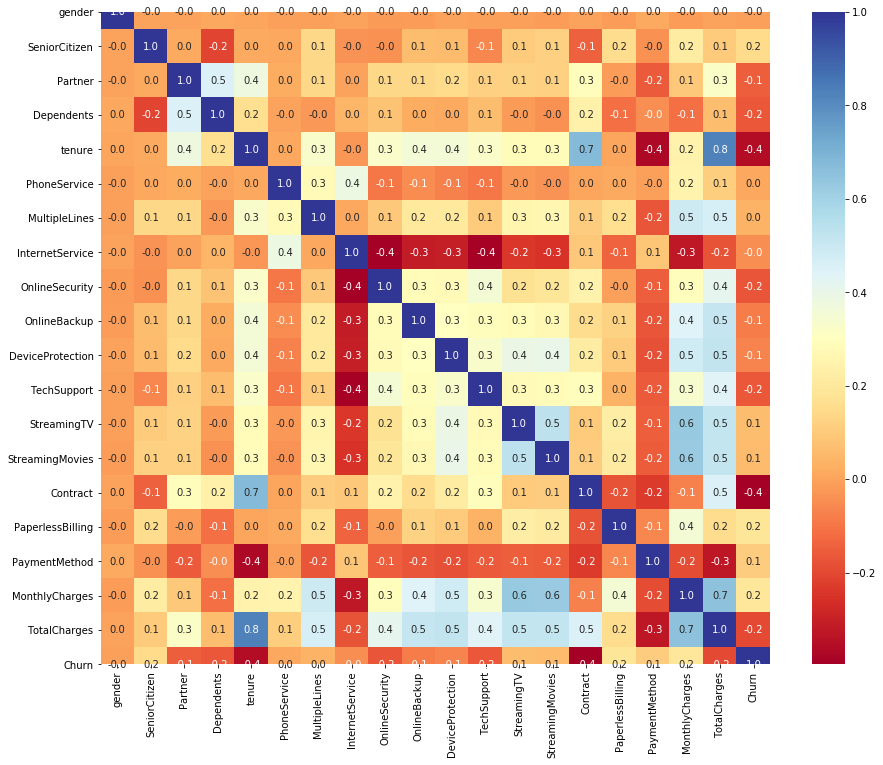

In [21]:
plt.figure(figsize = (15, 12))
sns.heatmap(data.corr(), cmap="RdYlBu", annot=True, fmt=".1f")
plt.show()

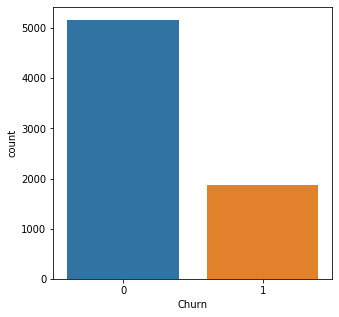

In [23]:
plt.figure(figsize=(5, 5))
plot= sns.countplot(x=data['Churn'],linewidth=1)
#The plot shows a imbalance of the data between churners and non-churners.

# Plot boxplot between Churn and numerical data tenure, Monthly Charges and Total Charges

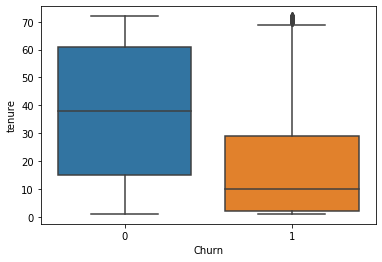

In [24]:
sns.boxplot(x='Churn', y='tenure', data=data)
#The tensure for Churning customers is less than the tenure for non-churning. The median for churning customers is 10 while
#the median of non-churning customers is 38.

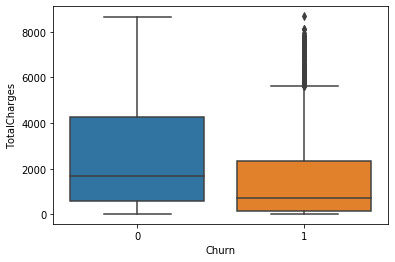

In [25]:
sns.boxplot(x='Churn', y='TotalCharges', data=data)
#The total charges for churning customers is lower than non-churning customers.

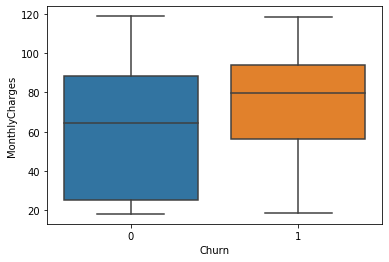

In [26]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
#The monthly charges for Churning customers is higher with a median of 80 than that of non-churning customers with a median 65.
#The inter-quartile range for churning customers is lower.

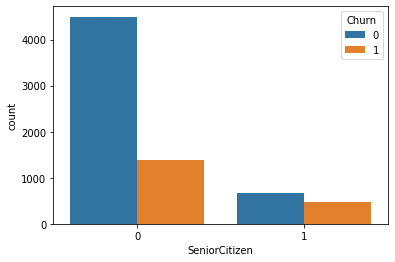

In [27]:
sns.countplot(x='SeniorCitizen', hue='Churn', data=data)
#Senior citizen churn rate is higher than non-senior citizen churn rate.

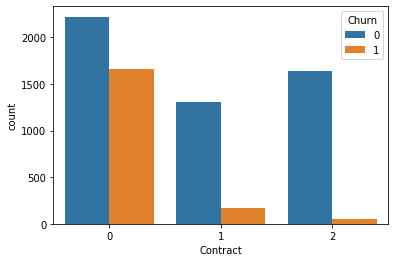

In [28]:
sns.countplot(x='Contract',hue='Churn', data=data)
# Churning customers for month-to-month contracts than one-year or two-year.

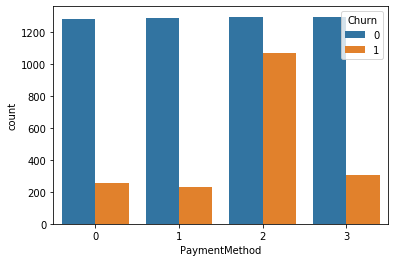

In [29]:
sns.countplot(x='PaymentMethod', hue='Churn', data=data)
# Payment method electronic check shows much higher churn rate.

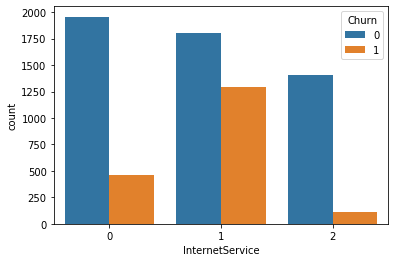

In [30]:
sns.countplot( x='InternetService',hue='Churn',data=data)
# Customers with InternetService fiber optic has more churning rate.

In [31]:
#Check for outliers
feature= ["tenure",'MonthlyCharges','TotalCharges']
df= data[feature]

Q1= df.quantile(0.25)
Q3= df.quantile(0.75)
IQR= Q3 - Q1
((df < (Q1-1.5*IQR)) | (df > (Q3 + 1.5 * IQR))).any()
#There are no outliers detected.

tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

# Data pre-processing: [ Score: 5 point ]
• Segregate predictors vs target attributes

• Check for target balancing and fix it if found imbalanced.
• Perform train-test split.

• Check if the train and test data have similar statistical characteristics when compared with original data.

In [32]:
#Feature Scaling
feature_numerical = ['tenure','MonthlyCharges','TotalCharges']
data_min_max = pd.DataFrame(data,columns=feature_numerical)
data_balance = data.drop(columns=feature_numerical)

In [33]:
min_max = MinMaxScaler()
feature_scaling = min_max.fit_transform(data_min_max)

In [34]:
scaling = pd.DataFrame(feature_scaling,columns=feature_numerical,index=data_balance.index)

In [35]:
data_3=pd.concat([data_balance,scaling],axis=1)

In [36]:
data_3.head(3)
#Final dataset.

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,2,0,0.000000,0.115423,0.001275
1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,3,0,0.464789,0.385075,0.215867
2,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,3,1,0.014085,0.354229,0.010310


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X1= data_3.drop('Churn',axis=1)
X=X1.values
y= data_3['Churn'].values

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Model training, testing and tuning: [ Score: 25 point ]
• Train and test all ensemble models taught in the learning module.

• Suggestion: Use standard ensembles available. Also you can design your own ensemble technique using weak classifiers.
    
• Display the classification accuracies for train and test data.

• Apply all the possible tuning techniques to train the best model for the given data.

• Suggestion: Use all possible hyper parameter combinations to extract the best accuracies.
    
• Display and compare all the models designed with their train and test accuracies.

• Select the final best trained model along with your detailed comments for selecting this model.

• Pickle the selected model for future use.

# Decision Tree Classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [42]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

0.9981714750101585
0.7199052132701422


# Bagging

In [43]:
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics


bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)


model_score = bgcl.score(X_train, y_train)
y_predict = bgcl.predict(X_train)
print("\Train accuracy:",round(100*model_score,2),"%")
print("\nConfusion matrix:\n\n",metrics.confusion_matrix(y_train, y_predict))

model_score = bgcl.score(X_test, y_test)
y_predict = bgcl.predict(X_test)

print("\nTest accuracy:",round(100*model_score,2),"%")
print("\nConfusion matrix:\n\n",metrics.confusion_matrix(y_test, y_predict))

\Train accuracy: 99.7 %

Confusion matrix:

 [[3580    3]
 [  12 1327]]

Test accuracy: 78.48 %

Confusion matrix:

 [[1384  196]
 [ 258  272]]


0.7848341232227488


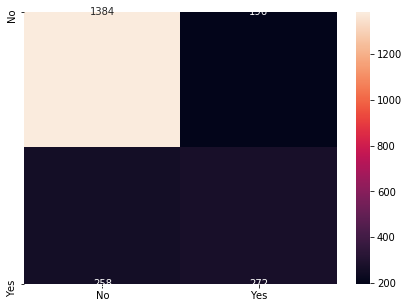

In [44]:
from sklearn.metrics import confusion_matrix

y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Ensemble Learning - AdaBoosting

In [45]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl = abcl.fit(X_train, y_train)

model_score = abcl.score(X_train, y_train)
y_predict = abcl.predict(X_train)
print("\Train accuracy:",round(100*model_score,2),"%")
print("\nConfusion matrix:\n\n",metrics.confusion_matrix(y_train, y_predict))

model_score = abcl.score(X_test, y_test)
y_predict = abcl.predict(X_test)

print("\nTest accuracy:",round(100*model_score,2),"%")
print("\nConfusion matrix:\n\n",metrics.confusion_matrix(y_test, y_predict))

\Train accuracy: 78.2 %

Confusion matrix:

 [[3254  329]
 [ 744  595]]

Test accuracy: 79.67 %

Confusion matrix:

 [[1443  137]
 [ 292  238]]


0.7966824644549763


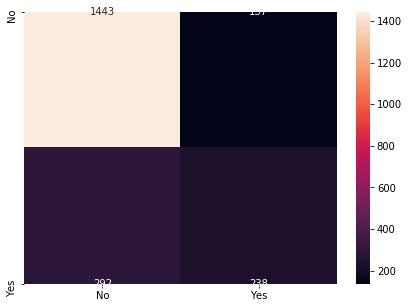

In [46]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Ensemble Learning - GradientBoost

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)


model_score = gbcl.score(X_train, y_train)
y_predict = gbcl.predict(X_train)
print("\Train accuracy:",round(100*model_score,2),"%")
print("\nConfusion matrix:\n\n",metrics.confusion_matrix(y_train, y_predict))

model_score = gbcl.score(X_test, y_test)
y_predict = gbcl.predict(X_test)

print("\nTest accuracy:",round(100*model_score,2),"%")
print("\nConfusion matrix:\n\n",metrics.confusion_matrix(y_test, y_predict))

\Train accuracy: 81.53 %

Confusion matrix:

 [[3257  326]
 [ 583  756]]

Test accuracy: 80.81 %

Confusion matrix:

 [[1428  152]
 [ 253  277]]


0.8080568720379147


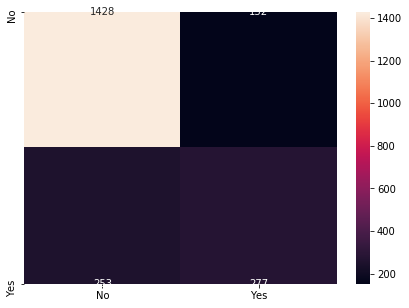

In [48]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Ensemble RandomForest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

model_score = rfcl.score(X_train, y_train)
y_predict = rfcl.predict(X_train)
print("\Train accuracy:",round(100*model_score,2),"%")
print("\nConfusion matrix:\n\n",metrics.confusion_matrix(y_train, y_predict))

model_score = rfcl.score(X_test, y_test)
y_predict = rfcl.predict(X_test)

print("\nTest accuracy:",round(100*model_score,2),"%")
print("\nConfusion matrix:\n\n",metrics.confusion_matrix(y_test, y_predict))

\Train accuracy: 99.76 %

Confusion matrix:

 [[3580    3]
 [   9 1330]]

Test accuracy: 78.58 %

Confusion matrix:

 [[1391  189]
 [ 263  267]]


0.785781990521327


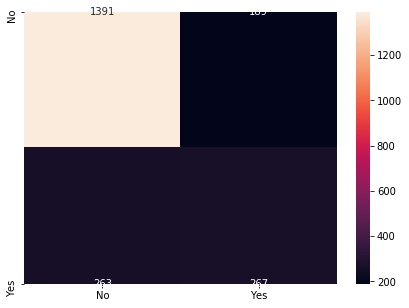

In [50]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# Gradient Boost is a better model compared to others with an accuracy of 80.81%